RISK ANALYTICS ASSIGNMENT
Anshita Jain - 21230023285
SECTOR : BANKING SECTOR
COMPANIES SELECTED FOR ANALYSIS:
1) Wells Fargo & Company
2) Citigroup Inc.
3) NatWest Group plc

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# List of global banks and their ticker symbols
banks = {
    "Wells Fargo & Company": "WFC",
    "Citigroup Inc.": "C",
    "NatWest Group plc": "NWG",
}

In [4]:
# Companies data
companies = ['WFC', 'C', 'NWG']
data = yf.download(companies, period = "5y")

[*********************100%***********************]  3 of 3 completed


In [5]:
data = pd.DataFrame(data)
data.head()

Price       Adj Close                           Close                       \
Ticker              C       NWG        WFC          C       NWG        WFC   
Date                                                                         
2020-01-02  67.122917  4.857565  47.053127  81.230003  6.993534  53.750000   
2020-01-03  65.858658  4.662964  46.764244  79.699997  6.713362  53.419998   
2020-01-06  65.652069  4.752779  46.484119  79.449997  6.842672  53.099998   
2020-01-07  65.081902  4.722841  46.098934  78.760002  6.799569  52.660000   
2020-01-08  65.577698  4.737810  46.239002  79.360001  6.821121  52.820000   

Price            High                             Low                       \
Ticker              C       NWG        WFC          C       NWG        WFC   
Date                                                                         
2020-01-02  81.260002  6.993534  54.040001  80.029999  6.939655  53.509998   
2020-01-03  80.519997  6.788793  53.619999  79.449997  6.702586  52.900002   
2020-01-06  79.550003  6.864224  53.200001  78.720001  6.756466  52.720001   
2020-01-07  79.300003  6.864224  53.049999  78.730003  6.788793  52.470001   
2020-01-08  80.000000  6.842672  53.330002  78.680000  6.767241  52.799999   

Price            Open                         Volume                     
Ticker              C       NWG        WFC         C      NWG       WFC  
Date                                                                     
2020-01-02  80.129997  6.961207  53.849998  12728900  1203059  16803100  
2020-01-03  79.800003  6.767241  53.110001  12437400  1421325  15608800  
2020-01-06  78.720001  6.756466  52.740002  10059500  1207514  13200300  
2020-01-07  79.290001  6.842672  53.049999  10469100   988506  13278600  
2020-01-08  78.769997  6.788793  52.840000  11292400   723654  16585600

In [6]:
prices = data['Adj Close']
prices.head()

Ticker,C,NWG,WFC
Date,,,
2020-01-02,67.122917,4.857565,47.053127
2020-01-03,65.858658,4.662964,46.764244
2020-01-06,65.652069,4.752779,46.484119
2020-01-07,65.081902,4.722841,46.098934
2020-01-08,65.577698,4.737810,46.239002


In [7]:
# Calculate daily returns
returns = prices.pct_change().dropna()
returns.head()

Ticker,C,NWG,WFC
Date,,,
2020-01-03,-0.018835,-0.040061,-0.006140
2020-01-06,-0.003137,0.019261,-0.005990
2020-01-07,-0.008685,-0.006299,-0.008286
2020-01-08,0.007618,0.003169,0.003038
2020-01-09,0.009073,-0.007899,-0.001704


In [8]:
nifty = yf.download('^NSEI', period = "5y")
nifty = pd.DataFrame(nifty)['Adj Close']
nifty.head()

[*********************100%***********************]  1 of 1 completed


Ticker,^NSEI
Date,
2020-01-02,12282.200195
2020-01-03,12226.650391
2020-01-06,11993.049805
2020-01-07,12052.950195
2020-01-08,12025.349609


In [9]:
# Risk analysis metrics
risk_metrics = pd.DataFrame({
    'Mean Return': returns.mean(),
    'Volatility': returns.std(),
    'Beta': returns.corrwith(nifty['^NSEI'])  # Using NFITY50 as market proxy - (Correlation with Market)
})
risk_metrics

,Mean Return,Volatility,Beta
Ticker,,,
C,0.000345,0.024653,0.023471
NWG,0.000923,0.026213,0.041376
WFC,0.000625,0.024634,0.042741


In [10]:
financials = {}
for company in companies:
    ticker = yf.Ticker(company)
    financials[company] = ticker.info

# Extracting the financial metrics from the info
financial_metrics = {
    'Company': [],
    'Revenue': [],
    'ROE': [],
    'Debt-to-Equity': []
}

for company in companies:
    financial_metrics['Company'].append(company)
    financial_metrics['Revenue'].append(financials[company].get('totalRevenue', 'N/A'))  # Total Revenue
    financial_metrics['ROE'].append(financials[company].get('returnOnEquity', 'N/A'))  # Return on Equity
    financial_metrics['Debt-to-Equity'].append(financials[company].get('debtToEquity', 'N/A'))  # Debt-to-Equity Ratio

financial = pd.DataFrame(financial_metrics)

In [11]:
#  Resample data to analyze performance trends (Yearly, Quarterly, Monthly)
Quarterly_performance = prices.resample('QE').last().pct_change().dropna()
Quarterly_performance.describe()

Ticker,C,NWG,WFC
count,20.000000,20.000000,20.000000
mean,0.046679,0.091939,0.060763
std,0.160435,0.181641,0.137186
min,-0.147816,-0.118033,-0.187286
25%,-0.087819,-0.027872,-0.036757
50%,0.001593,0.055878,0.031889
75%,0.148288,0.182332,0.167758
max,0.448021,0.680297,0.298663


In [12]:
#  Stock Price Trends of JPMorgan Chase, Bank of America, and HSBC Holdings
fig = px.line(prices, x = prices.index, y = prices.columns, title = "Stock Price Trends", labels = {'value': 'Price', 'index': 'Date'})
fig.update_layout(title = "Stock Price Trends of Wells Fargo & Company, Citigroup Inc., and NatWest Group plc", xaxis_title = "Date", yaxis_title = "Price")
fig.show()

In [13]:
# Quarterly Stock Price Trends of JPMorgan Chase, Bank of America, and HSBC Holdings
fig = px.line(Quarterly_performance, x = Quarterly_performance.index, y = Quarterly_performance.columns, title = "Quarterly Stock Price Trends",
              labels = {'value': 'Price', 'index': 'Date'})
fig.update_layout(title = "Quarterly Stock Price Trends of Wells Fargo & Company, Citigroup Inc., and NatWest Group plc", xaxis_title = "Date", yaxis_title = "Price")
fig.show()

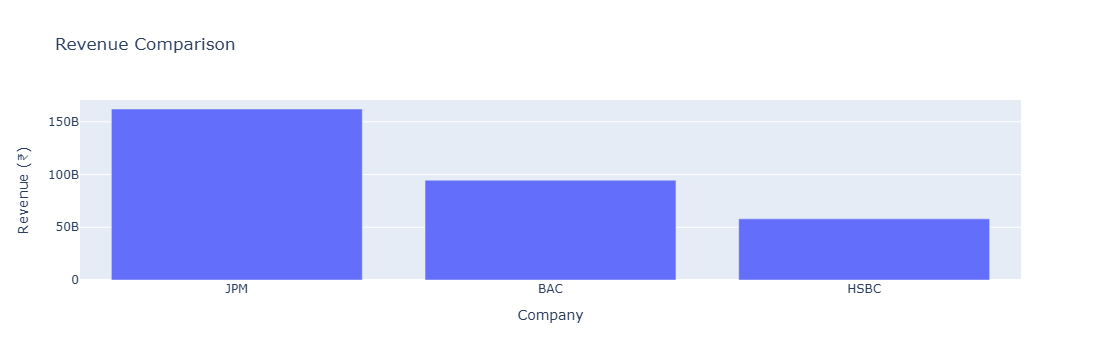

In [ ]:
# Revenue Comparison
fig = px.bar(financial, x = 'Company', y = 'Revenue', title = "Revenue Comparison", labels = {'Revenue': 'Revenue (₹)', 'Company': 'Company'})
fig.update_layout(yaxis_title = "Revenue (₹)", xaxis_title = "Company")
fig.show()

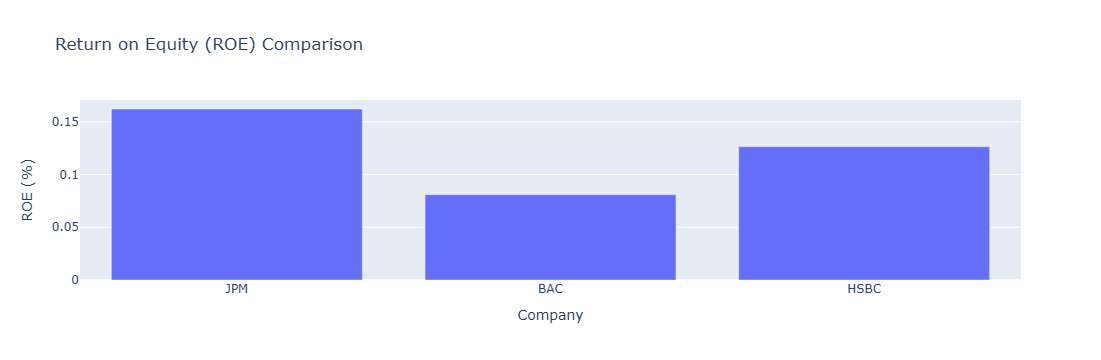

In [ ]:
# Return on Equity (ROE) Comparison
fig = px.bar(financial, x = 'Company', y = 'ROE', title = "Return on Equity (ROE) Comparison", labels = {'ROE': 'ROE (%)', 'Company': 'Company'})
fig.update_layout(yaxis_title = "ROE (%)", xaxis_title = "Company")
fig.show()

SEASONAL ANALYSIS:

In [ ]:
# Calculate overall sector performance (average of all three companies)
Sector_performance = prices.mean(axis=1)
Sector_performance.head()

Date
2020-01-02    61.152180
2020-01-03    60.242929
2020-01-06    60.163392
2020-01-07    59.340038
2020-01-08    59.728055
dtype: float64

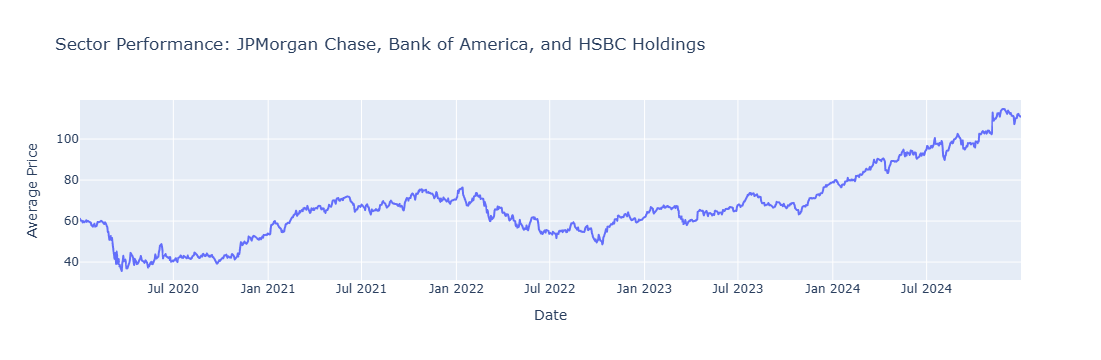

In [ ]:
fig = px.line(Sector_performance, x = Sector_performance.index, y = Sector_performance,
              title = "Sector Performance (Average of JPMorgan Chase, Bank of America, and HSBC Holdings )",
              labels = {'value': 'Average Price', 'index': 'Date'})
fig.update_layout(title = "Sector Performance: JPMorgan Chase, Bank of America, and HSBC Holdings", xaxis_title = "Date", yaxis_title = "Average Price")
fig.show()

In [ ]:
# Calculate Sharpe Ratio for each company
rfr = 0.04 / 252  # Approx daily risk-free rate (assume 4% annual)
sharpe_ratios = (returns.mean() - rfr) / returns.std()

investment_recommendations = pd.DataFrame({
    'Sharpe Ratio': sharpe_ratios,
    'Risky?': sharpe_ratios < 1,
    'Recommendation': ['Buy' if sharpe >= 1 else 'Sell' for sharpe in sharpe_ratios]
})
investment_recommendations

,Sharpe Ratio,Risky?,Recommendation
Ticker,,,
BAC,0.015951,True,Sell
HSBC,0.022342,True,Sell
JPM,0.028650,True,Sell


INTERPRETATION :

1) Sharpe Ratio:

The Sharpe Ratio is a measure of risk-adjusted return, indicating how much excess return an investor can expect for each unit of risk taken. A higher Sharpe Ratio suggests better risk-adjusted returns.
In this dataset:
BAC has a Sharpe Ratio of 0.015951.
HSBC has a Sharpe Ratio of 0.022342.
JPM has a Sharpe Ratio of 0.028650.
All of these Sharpe Ratios are relatively low, suggesting that these companies offer only modest returns for the level of risk involved.
Typically, a Sharpe Ratio greater than 1.0 is considered good, while values below 1.0 indicate that the returns are not sufficient to justify the level of risk.

2) Risk Assessment:

The "Risky?" column marks each of the companies as true, implying that they are considered risky investments in terms of their risk-return profile.
Given that all companies have low Sharpe Ratios, it indicates that these stocks might not provide sufficient returns in comparison to the risk involved. Therefore, these companies are categorized as risky investments.
3) Recommendation:

The recommendation for all three companies (BAC, HSBC, JPM) is "Sell". This aligns with the low Sharpe Ratios, reinforcing that these stocks may not be providing adequate returns for the risk taken, and thus investors may consider selling their positions in these companies.

CONCLUSION:
Based on the provided Sharpe Ratios and the risk assessment, it appears that all three companies— BAC, HSBC, and JPM —are offering modest returns relative to the level of risk involved. As a result, the investment recommendation is to sell these stocks, as they do not present an attractive risk-adjusted return. Investors should consider re-evaluating their portfolios and potentially seek alternative investments with better risk-return profiles.